In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
from save_and_compare_results import *
from sklearn.linear_model import LassoCV
import shap


In [ ]:
# Define the path to the parent directory
data_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Move one level up

# Load the preprocessed data
X = pd.read_pickle(os.path.join(data_dir, "data/X_matrix_proteins_nb.pkl"))
Y = pd.read_pickle(os.path.join(data_dir, "data/Y_matrix_proteins_nb.pkl"))

In [3]:
# Preprocess the data
X = X.drop(columns=["Yeast_ID"]).fillna(0)
Y = Y.drop(columns=["Yeast_ID"]).fillna(Y.drop(columns=["Yeast_ID"]).mean())

In [4]:
# Define the hyperparameter grid
GBM_distributions = dict(
    max_features=["auto", "sqrt"],
    learning_rate=uniform(1e-3, 1),
    subsample=uniform(0, 1),
    min_samples_split=[50],
    min_samples_leaf=[50],
    n_estimators=[150],
    criterion=['friedman_mse', 'squared_error'],
    max_depth=[10]
)

In [5]:
n_iterations = 100
cross_val = 3
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=GBM_distributions,
    n_iter=n_iterations,
    verbose=2,
    cv=cross_val,
    n_jobs=-1,
    random_state=42
)

# Fit the model
print("Running hyperparameter tuning for Gradient Boosting...")
random_search.fit(X, Y)

Running hyperparameter tuning for Gradient Boosting...
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d arr

[CV] END criterion=friedman_mse, learning_rate=0.597850157946487, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.15599452033620265; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.597850157946487, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.15599452033620265; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.597850157946487, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.15599452033620265; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d arr

[CV] END criterion=friedman_mse, learning_rate=0.46024889196586716, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6011150117432088; total time=  19.0s
[CV] END criterion=friedman_mse, learning_rate=0.46024889196586716, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6011150117432088; total time=  19.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.46024889196586716, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6011150117432088; total time=  19.8s
[CV] END criterion=squared_error, learning_rate=0.9395527090157502, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.18182496720710062; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9395527090157502, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.18182496720710062; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.9395527090157502, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.18182496720710062; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6184815096277165, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5247564316322378; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.6184815096277165, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5247564316322378; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6184815096277165, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5247564316322378; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7975429868602328, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7319939418114051; total time=  26.7s
[CV] END criterion=friedman_mse, learning_rate=0.7975429868602328, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7319939418114051; total time=  26.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.04766566321361543, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3663618432936917; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.7975429868602328, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7319939418114051; total time=  27.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.04766566321361543, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3663618432936917; total time=   0.4s
[CV] END criterion=squared_error, learning_rate=0.04766566321361543, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3663618432936917; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.0916064345328208, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.19967378215835974; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.0916064345328208, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.19967378215835974; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.0916064345328208, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.19967378215835974; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.9842308858067882, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.046450412719997725; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9842308858067882, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.046450412719997725; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.9842308858067882, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.046450412719997725; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6813075385877797, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.06505159298527952; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.6813075385877797, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.06505159298527952; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6813075385877797, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.06505159298527952; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9432017556848528, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8083973481164611; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9432017556848528, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8083973481164611; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9432017556848528, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8083973481164611; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.016966252220214195, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6842330265121569; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.016966252220214195, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6842330265121569; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.016966252220214195, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6842330265121569; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.6842635188254582, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4951769101112702; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6842635188254582, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4951769101112702; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.6842635188254582, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4951769101112702; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.17436465350777208, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2587799816000169; total time=   4.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.17436465350777208, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2587799816000169; total time=   4.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7563614103176525, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5200680211778108; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7563614103176525, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5200680211778108; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7563614103176525, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5200680211778108; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.17436465350777208, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2587799816000169; total time=   3.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.024062425041415758, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6118528947223795; total time=  21.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.024062425041415758, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6118528947223795; total time=  21.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.45075413336976566, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8948273504276488; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.45075413336976566, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8948273504276488; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.45075413336976566, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8948273504276488; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7282719958564209, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.0884925020519195; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7282719958564209, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.0884925020519195; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7282719958564209, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.0884925020519195; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.5218342600258237, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.32533033076326434; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.5218342600258237, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.32533033076326434; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.5218342600258237, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.32533033076326434; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6518884729488529, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9699098521619943; total time=  46.5s
[CV] END criterion=squared_error, learning_rate=0.024062425041415758, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6118528947223795; total time=  20.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6518884729488529, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9699098521619943; total time=  47.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.966255307264138, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5426960831582485; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.966255307264138, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5426960831582485; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.966255307264138, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5426960831582485; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2972735057040824, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.07455064367977082; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2972735057040824, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.07455064367977082; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2972735057040824, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.07455064367977082; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.4244014807063696, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1987156815341724; total time=   3.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.4244014807063696, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1987156815341724; total time=   2.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.4244014807063696, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1987156815341724; total time=   2.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6518884729488529, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9699098521619943; total time=  45.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7483201101373809, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8287375091519293; total time=  30.3s
[CV] END criterion=squared_error, learning_rate=0.7483201101373809, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8287375091519293; total time=  30.0s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7911755405312056, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.07404465173409036; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7911755405312056, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.07404465173409036; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7911755405312056, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.07404465173409036; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7483201101373809, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8287375091519293; total time=  30.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6520770255019445, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8631034258755935; total time=   0.6s
[CV] END criterion=friedman_mse, learning_rate=0.6520770255019445, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8631034258755935; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4504506741382034, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.06355835028602363; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4504506741382034, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.06355835028602363; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.6520770255019445, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8631034258755935; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4504506741382034, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.06355835028602363; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5687003278199915, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9695846277645586; total time=  42.8s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.015079822715084457, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7068573438476171; total time=  23.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5687003278199915, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9695846277645586; total time=  44.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5687003278199915, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9695846277645586; total time=  42.8s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.015079822715084457, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7068573438476171; total time=  23.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.27572179299006416, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4722149251619493; total time=  12.0s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.27572179299006416, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4722149251619493; total time=  11.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.27572179299006416, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4722149251619493; total time=  11.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.23698491974895575, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.49379559636439074; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.23698491974895575, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.49379559636439074; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.23698491974895575, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.49379559636439074; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7116628896857874, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.02541912674409519; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7116628896857874, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.02541912674409519; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7116628896857874, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.02541912674409519; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2027192023353962, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6364104112637804; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2027192023353962, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6364104112637804; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.015079822715084457, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7068573438476171; total time=  23.0s
[CV] END criterion=friedman_mse, learning_rate=0.2027192023353962, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6364104112637804; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5642755719763837, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.907566473926093; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=0.5642755719763837, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.907566473926093; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5642755719763837, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.907566473926093; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6698412526636073, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7296061783380641; total time=  24.6s
[CV] END criterion=friedman_mse, learning_rate=0.6698412526636073, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7296061783380641; total time=  24.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6698412526636073, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7296061783380641; total time=  24.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.943853570557981, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.289751452913768; total time=   4.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.943853570557981, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.289751452913768; total time=   4.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.8814678390152577, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.808120379564417; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.8814678390152577, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.808120379564417; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.8814678390152577, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.808120379564417; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.10649425983027061, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8036720768991145; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.10649425983027061, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8036720768991145; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.943853570557981, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.289751452913768; total time=   4.1s
[CV] END criterion=friedman_mse, learning_rate=0.10649425983027061, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8036720768991145; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4175099478703662, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5393422419156507; total time=   0.4s
[CV] END criterion=squared_error, learning_rate=0.4175099478703662, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5393422419156507; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4175099478703662, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5393422419156507; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9727120953891037, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7607850486168974; total time=  25.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.12308795470067335, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3180034749718639; total time=   5.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.12308795470067335, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3180034749718639; total time=   5.8s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9727120953891037, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7607850486168974; total time=  25.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.12308795470067335, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3180034749718639; total time=   6.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.353568856334169, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.006952130531190703; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.9727120953891037, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7607850486168974; total time=  25.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.353568856334169, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.006952130531190703; total time=   0.2s
[CV] END criterion=squared_error, learning_rate=0.353568856334169, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.006952130531190703; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.535089419375442, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.22210781047073025; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.535089419375442, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.22210781047073025; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.535089419375442, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.22210781047073025; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2704123337985215, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9429097039125192; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2704123337985215, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9429097039125192; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2704123337985215, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9429097039125192; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.21976421957307024, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7030189588951778; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=0.21976421957307024, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7030189588951778; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.21976421957307024, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7030189588951778; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.06589224710898156, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9624472949421112; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.06589224710898156, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9624472949421112; total time=   0.7s
[CV] END criterion=friedman_mse, learning_rate=0.06589224710898156, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9624472949421112; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6054173792778172, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7555511385430487; total time=  26.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6054173792778172, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7555511385430487; total time=  27.0s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2731322493846353, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4271077886262563; total time=  10.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2731322493846353, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4271077886262563; total time=  10.2s
[CV] END criterion=squared_error, learning_rate=0.6973042728397884, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.30087830981676966; total time=   4.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6973042728397884, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.30087830981676966; total time=   4.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2731322493846353, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4271077886262563; total time=  10.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6054173792778172, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7555511385430487; total time=  26.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6353513447013638, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1448948720912231; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6353513447013638, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1448948720912231; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.6353513447013638, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1448948720912231; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.44878316457309164, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2420552715115004; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.44878316457309164, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2420552715115004; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.6973042728397884, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.30087830981676966; total time=   5.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.44878316457309164, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2420552715115004; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.08185332633271525, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.23763754399239967; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.08185332633271525, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.23763754399239967; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.08185332633271525, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.23763754399239967; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4120370133182313, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.27864646423661144; total time=   4.0s
[CV] END criterion=squared_error, learning_rate=0.4120370133182313, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.27864646423661144; total time=   3.8s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.39982444244455306, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.0902897700544083; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.4120370133182313, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.27864646423661144; total time=   3.8s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.39982444244455306, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.0902897700544083; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.39982444244455306, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.0902897700544083; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.15171754396542947, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.18651851039985423; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.15171754396542947, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.18651851039985423; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.15171754396542947, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.18651851039985423; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8593588048137198, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6775643618422824; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.8593588048137198, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6775643618422824; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8593588048137198, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6775643618422824; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7121495324380178, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.22649577519793795; total time=   3.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7121495324380178, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.22649577519793795; total time=   3.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7121495324380178, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.22649577519793795; total time=   3.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9987404850489419, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6095643339798968; total time=  18.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9987404850489419, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6095643339798968; total time=  18.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5187513505274801, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.13752094414599325; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9987404850489419, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6095643339798968; total time=  18.8s
[CV] END criterion=squared_error, learning_rate=0.5187513505274801, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.13752094414599325; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5187513505274801, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.13752094414599325; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7362161192407721, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9246936182785628; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7362161192407721, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9246936182785628; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.7362161192407721, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9246936182785628; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8041397563798959, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6323058305935795; total time=  19.8s
[CV] END criterion=friedman_mse, learning_rate=0.8041397563798959, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6323058305935795; total time=  19.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9831683433294356, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5296505783560065; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8041397563798959, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6323058305935795; total time=  20.1s
[CV] END criterion=squared_error, learning_rate=0.9831683433294356, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5296505783560065; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9831683433294356, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5296505783560065; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9972536997579243, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8972157579533268; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=0.9972536997579243, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8972157579533268; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=0.9972536997579243, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8972157579533268; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8836363431893397, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3390297910487007; total time=   6.6s
[CV] END criterion=friedman_mse, learning_rate=0.8836363431893397, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3390297910487007; total time=   6.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7013578299727713, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8971102599525771; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.09717655109142076, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.690937738102466; total time=  23.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7013578299727713, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8971102599525771; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7013578299727713, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8971102599525771; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.09717655109142076, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.690937738102466; total time=  24.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8836363431893397, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3390297910487007; total time=   6.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9366349942209475, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8985541885270792; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9366349942209475, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8985541885270792; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9366349942209475, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8985541885270792; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5816866214364547, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1014715428660321; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6967843993450822, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.659984046034179; total time=  21.1s
[CV] END criterion=squared_error, learning_rate=0.5816866214364547, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1014715428660321; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.09717655109142076, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.690937738102466; total time=  23.5s
[CV] END criterion=squared_error, learning_rate=0.5816866214364547, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1014715428660321; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.9746638367553173, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.16080805141749865; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.9746638367553173, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.16080805141749865; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.9746638367553173, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.16080805141749865; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.6967843993450822, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.659984046034179; total time=  21.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.17692525267734538, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.23724908749680007; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.17692525267734538, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.23724908749680007; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.17692525267734538, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.23724908749680007; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.1798227092213288, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6496328990472147; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.1798227092213288, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6496328990472147; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.1798227092213288, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6496328990472147; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6967843993450822, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.659984046034179; total time=  21.0s
[CV] END criterion=friedman_mse, learning_rate=0.7219399242521293, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5683086033354716; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7219399242521293, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5683086033354716; total time=   0.4s
[CV] END criterion=friedman_mse, learning_rate=0.7219399242521293, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5683086033354716; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.50981407683876, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.26520236768172545; total time=   0.3s
[CV] END criterion=squared_error, learning_rate=0.50981407683876, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.26520236768172545; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.50981407683876, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.26520236768172545; total time=   0.4s
[CV] END criterion=squared_error, learning_rate=0.5908708475605439, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3930977246667604; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5908708475605439, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3930977246667604; total time=   0.4s
[CV] END criterion=squared_error, learning_rate=0.5908708475605439, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3930977246667604; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4055081271221901, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6420316461542878; total time=  20.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4055081271221901, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6420316461542878; total time=  20.8s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4055081271221901, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6420316461542878; total time=  20.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4866137535862266, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6519612595026005; total time=  21.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.4866137535862266, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6519612595026005; total time=  21.3s
[CV] END criterion=squared_error, learning_rate=0.4866137535862266, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6519612595026005; total time=  21.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.23118526824155528, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2807723624408558; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.23118526824155528, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2807723624408558; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.23118526824155528, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.2807723624408558; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.769554014306309, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.17711067940704894; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.769554014306309, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.17711067940704894; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.769554014306309, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.17711067940704894; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.47094451399094295, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9148643902204485; total time=   0.6s
[CV] END criterion=squared_error, learning_rate=0.47094451399094295, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9148643902204485; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.47094451399094295, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9148643902204485; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6461033620305648, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4925176938188639; total time=  13.1s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6461033620305648, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4925176938188639; total time=  13.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.907098787718554, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7948113035416484; total time=  29.0s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.907098787718554, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7948113035416484; total time=  29.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.6461033620305648, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.4925176938188639; total time=  13.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.907098787718554, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7948113035416484; total time=  29.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.07634625600612821, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.38509772860192526; total time=   8.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.07634625600612821, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.38509772860192526; total time=   8.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2694748568901568, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1694927466860925; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2694748568901568, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1694927466860925; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.2694748568901568, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.1694927466860925; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.07634625600612821, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.38509772860192526; total time=   8.3s
[CV] END criterion=friedman_mse, learning_rate=0.3956914668094722, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.696029796674973; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.3956914668094722, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.696029796674973; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.3956914668094722, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.696029796674973; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.0714161308495439, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6150072266991697; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.0714161308495439, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6150072266991697; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.0714161308495439, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.6150072266991697; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7487187738974139, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9283185625877254; total time=  40.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7487187738974139, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9283185625877254; total time=  42.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3235507642386005, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.697015740995268; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3235507642386005, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.697015740995268; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3596467812961639, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5183296523637367; total time=  14.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3235507642386005, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.697015740995268; total time=   0.5s
[CV] END criterion=squared_error, learning_rate=0.3596467812961639, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5183296523637367; total time=  14.8s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7487187738974139, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9283185625877254; total time=  41.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.4207808564462765, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8670723185801037; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.4207808564462765, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8670723185801037; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.4207808564462765, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.8670723185801037; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.7099109969101186, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.29359184426449336; total time=   4.8s
[CV] END criterion=friedman_mse, learning_rate=0.7099109969101186, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.29359184426449336; total time=   4.7s
[CV] END criterion=friedman_mse, learning_rate=0.5537649668354899, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9636199770892528; total time=  43.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d arr

[CV] END criterion=friedman_mse, learning_rate=0.7099109969101186, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.29359184426449336; total time=   4.7s
[CV] END criterion=friedman_mse, learning_rate=0.19527395351204224, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7019668772577033; total time=   0.5s
[CV] END criterion=friedman_mse, learning_rate=0.19527395351204224, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7019668772577033; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.19527395351204224, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7019668772577033; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3596467812961639, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5183296523637367; total time=  14.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.5537649668354899, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9636199770892528; total time=  44.1s
[CV] END criterion=friedman_mse, learning_rate=0.5537649668354899, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.9636199770892528; total time=  43.9s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5798648955075587, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.578280140996174; total time=   0.4s
[CV] END criterion=squared_error, learning_rate=0.5798648955075587, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.578280140996174; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.5798648955075587, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.578280140996174; total time=   0.4s
[CV] END criterion=squared_error, learning_rate=0.32915266747473193, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5426446347075766; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.32915266747473193, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5426446347075766; total time=   0.4s
[CV] END criterion=squared_error, learning_rate=0.32915266747473193, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5426446347075766; total time=   0.4s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8399335020693633, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.03050024993904943; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.8399335020693633, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.03050024993904943; total time=   0.2s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=friedman_mse, learning_rate=0.8399335020693633, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.03050024993904943; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.05176853103939694, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3379951568515358; total time=   6.8s
[CV] END criterion=squared_error, learning_rate=0.05176853103939694, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3379951568515358; total time=   6.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3276512417960409, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7699935530986108; total time=   0.5s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3276512417960409, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7699935530986108; total time=   0.6s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.3276512417960409, max_depth=10, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.7699935530986108; total time=   0.7s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9662518303907698, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.085347464993768; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9662518303907698, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.085347464993768; total time=   0.3s


/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END criterion=squared_error, learning_rate=0.9662518303907698, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.085347464993768; total time=   0.3s
[CV] END criterion=friedman_mse, learning_rate=0.08259418040024036, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5015162946871996; total time=  13.3s
[CV] END criterion=squared_error, learning_rate=0.05176853103939694, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.3379951568515358; total time=   7.0s
[CV] END criterion=friedman_mse, learning_rate=0.08259418040024036, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators=150, subsample=0.5015162946871996; total time=  13.3s
[CV] END criterion=friedman_mse, learning_rate=0.08259418040024036, max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=50, n_estimators

/Users/claradelandre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbc90c5bb50>,
                                        'max_depth': [10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [50],
                                        'min_samples_split': [50],
                                        'n_estimators': [150],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbca0dfbb80>},
                   random_state=42, verbose=2)

In [6]:
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest hyperparameters:", best_params)


Best hyperparameters: {'criterion': 'squared_error', 'learning_rate': 0.05176853103939694, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 150, 'subsample': 0.3379951568515358}


In [7]:
# Evaluate the best model
y_pred = best_model.predict(X)
r2 = r2_score(Y, y_pred)
mse = mean_squared_error(Y, y_pred)
print(f"\nR² Score: {r2:.4f}, Mean Squared Error: {mse:.4f}")


R² Score: 0.3988, Mean Squared Error: 0.0301


With binary :  
Best hyperparameters for each target: [{'criterion': 'squared_error', 'learning_rate': 0.01645661652886743, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 47, 'min_samples_split': 54, 'n_estimators': 104, 'subsample': 0.9636199770892528}]   
R² Score: 0.3503, Mean Squared Error: 0.0326 



With numbers :  
Best hyperparameters: {'criterion': 'squared_error', 'learning_rate': 0.05176853103939694, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 150, 'subsample': 0.3379951568515358}
R² Score: 0.3988, Mean Squared Error: 0.0301

# Model features importance

In [8]:
print("Saving GBM feature importances...")

save_feature_importance(
    features=X.columns,
    importance_scores=best_model.feature_importances_,
    method="model",
    model_name="GBM"
)

Saving GBM feature importances...
Feature importance saved to results/GBM_model_importance.csv


Affichage des 10 caractéristiques les plus importantes...

Mutations ayant le plus d'impact sur le YPD doubling time :
           Feature  Importance
556        YBR291C    0.033920
11286  YNL170W_CNV    0.015195
6262       YPL267W    0.014872
3393       YJL217W    0.014421
4686       YMR080C    0.012936
989        YDL227C    0.010451
4403       YLR410W    0.010152
10341    YLR154W-F    0.009840
1880       YER171W    0.009230
8964   YHL047C_CNV    0.008963


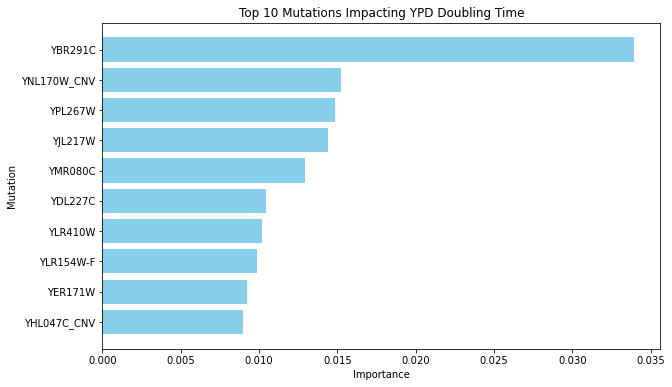

In [9]:
# Afficher et tracer les 10 caractéristiques les plus importantes
print("Affichage des 10 caractéristiques les plus importantes...")
feature_importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Sélectionner les 10 caractéristiques les plus importantes
top_mutations = feature_importances_df.head(10)

# Afficher dans la console
print("\nMutations ayant le plus d'impact sur le YPD doubling time :")
print(top_mutations)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(top_mutations["Feature"], top_mutations["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Mutation")
plt.title("Top 10 Mutations Impacting YPD Doubling Time")
plt.gca().invert_yaxis()
plt.show()

# SHAP importances

In [10]:
# SHAP analysis
print("Calculating SHAP values...")
explainer = shap.Explainer(best_model, X)
shap_values = explainer(X)
shap_mean_importance = np.abs(shap_values.values).mean(axis=0)

# Save SHAP feature importance
print("Saving SHAP feature importances...")
save_feature_importance(
    features=X.columns,
    importance_scores=shap_mean_importance,
    method="SHAP",
    model_name="GBM"
)

Calculating SHAP values...
Saving SHAP feature importances...
Feature importance saved to results/GBM_SHAP_importance.csv


Generating SHAP plots...


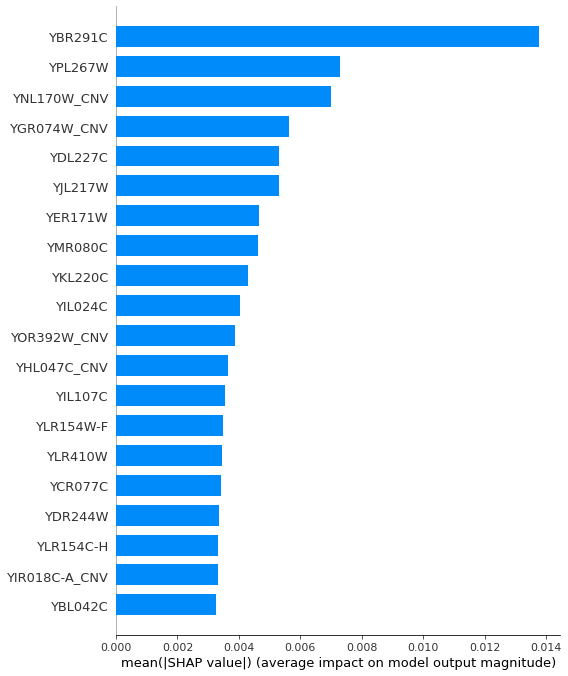

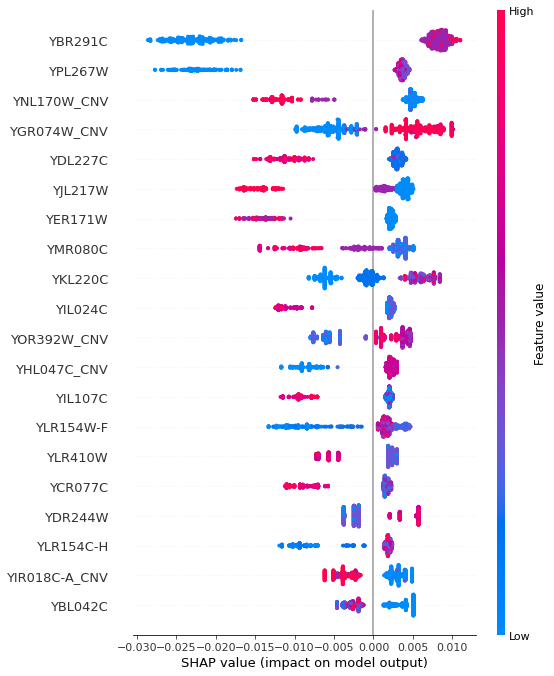

In [11]:
# Generate SHAP summary plots
print("Generating SHAP plots...")
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)